In [937]:
import pandas as pd
import seaborn as sns

In [2]:
YEARS = range(2020,2023)

In [723]:
data = pd.DataFrame()

for i in YEARS:  
    i_data = pd.read_csv('https://github.com/nflverse/nflverse-data/releases/download/pbp/' \
                   'play_by_play_' + str(i) + '.csv.gz',
                   compression= 'gzip', low_memory= False)

    data = data.append(i_data, sort=True)

/Users/towerzhai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pass', ylabel='count'>

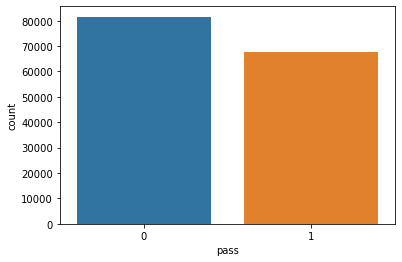

In [938]:
sns.countplot('pass',data=data)

In [724]:
df = data[['game_id',
    'passer_player_id','rusher_player_id','receiver_player_id',
           'yards_gained','complete_pass','pass_touchdown',
          'interception', 'touchdown']]

In [725]:
mask_p = df['passer_player_id'].notnull()
mask_ru = df['rusher_player_id'].notnull()
mask_re = df['receiver_player_id'].notnull()
df.loc[mask_p, 'fan_point1'] = df.loc[mask_p, 'yards_gained'] * 0.04
df.loc[mask_p, 'fan_point4'] = df.loc[mask_p, 'pass_touchdown'] * 4
df.loc[mask_p, 'fan_point5'] = df.loc[mask_p, 'interception'] * (-2)
df.loc[mask_ru, 'fan_point2'] = df.loc[mask_ru, 'yards_gained'] * 0.1
df.loc[mask_ru, 'fan_point6'] = df.loc[mask_ru, 'touchdown'] * 6
df.loc[mask_re, 'fan_point3'] = df.loc[mask_re, 'yards_gained'] * 0.1
df.loc[mask_re, 'fan_point7'] = df.loc[mask_re, 'complete_pass'] * 0.5

/Users/towerzhai/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/towerzhai/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [726]:
df1 = df[['fan_point1','fan_point2','fan_point3','fan_point4','fan_point5','fan_point6','fan_point7']]

In [727]:
df1['total'] = df1.sum(axis=1)
data['fantasy_points'] = df1['total']

<ipython-input-727-c8d0d69507e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total'] = df1.sum(axis=1)


In [728]:
data

,aborted_play,air_epa,air_wpa,air_yards,assist_tackle,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,...,xyac_success,yac_epa,yac_wpa,yardline_100,yards_after_catch,yards_gained,ydsnet,ydstogo,yrdln,fantasy_points
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,ARI 35,0.0
1,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,35.0,NaN,0.0,41.0,0,ARI 35,0.0
2,0,-0.132787,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.619306,1.427625,0.033715,75.0,1.0,5.0,41.0,10,SF 25,1.2
3,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,55.0,NaN,14.0,41.0,10,SF 45,1.4
4,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,41.0,NaN,2.0,41.0,10,ARI 41,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50142,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,66.0,0,PHI 9,0.0
50143,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,NaN,0.0,66.0,8,PHI 9,0.0
50144,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,35.0,NaN,0.0,0.0,0,KC 35,0.0
50145,0,2.018289,0.0,45.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,-2.089092,-0.127170,64.0,NaN,0.0,0.0,10,PHI 36,0.0


'fan_points' = (0.1 * 'rush_yards' + 0.1 * 'receiving_yards' + 0.5 * 'catches'
                + 0.04 * 'passing_yards' + 4 * 'passing_touchdowns'  
                - 2 * 'interception' + 6 * 'touchdowns')

In [108]:
from sklearn.preprocessing import LabelEncoder

In [729]:
passing_data = data[data['play_type'] == 'pass']

# 2. Feature selection
selected_features_pass = ['game_id',
    'down', 'ydstogo', 'yardline_100', 
    'quarter_seconds_remaining', 'half_seconds_remaining', 
    'game_seconds_remaining', 'score_differential', 
    'air_yards', 'yards_after_catch', 'air_epa', 'yac_epa', 
    'posteam', 'defteam', 'passer_player_id','fumble','incomplete_pass', 'complete_pass'
]


# Filter dataset to only include selected features and target variable
passing_data = passing_data[selected_features_pass + ['yards_gained','pass_touchdown','interception']]

passing_data = passing_data.sort_values(by=['game_id', 'game_seconds_remaining'], ascending=[True, False])

first_row_each_game = passing_data.drop_duplicates(subset='game_id', keep='first')

passing_data = pd.concat([passing_data,first_row_each_game]).drop_duplicates(keep=False)

for col in ['air_yards', 'yards_after_catch', 'air_epa', 'yac_epa']:
    passing_data[col].fillna(passing_data[col].mean(), inplace=True)

label_encoder = LabelEncoder()
passing_data['passer_player_id'] = label_encoder.fit_transform(passing_data['passer_player_id'].astype(str))

passing_data['prev_yards_gained'] = passing_data.groupby('game_id')['yards_gained'].shift(1)
passing_data['prev_touchdown'] = passing_data.groupby('game_id')['pass_touchdown'].shift(1)
passing_data['prev_interception'] = passing_data.groupby('game_id')['interception'].shift(1)

In [731]:
passing_data = passing_data.dropna()
label_encoders = {}
for col in ['posteam', 'defteam', 'passer_player_id']:
    le = LabelEncoder()
    passing_data[col] = le.fit_transform(passing_data[col].astype(str))
    label_encoders[col] = le
passing_data

<ipython-input-731-8b4f81864798>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passing_data[col] = le.fit_transform(passing_data[col].astype(str))


,game_id,down,ydstogo,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,score_differential,air_yards,yards_after_catch,...,passer_player_id,fumble,incomplete_pass,complete_pass,yards_gained,pass_touchdown,interception,prev_yards_gained,prev_touchdown,prev_interception
9,2020_01_ARI_SF,1.0,10,75.0,710.0,1610.0,3410.0,-3.0,3.0,0.000000,...,38,0.0,0.0,1.0,3.0,0.0,0.0,11.0,0.0,0.0
10,2020_01_ARI_SF,2.0,7,72.0,684.0,1584.0,3384.0,-3.0,6.0,1.000000,...,38,0.0,0.0,1.0,7.0,0.0,0.0,3.0,0.0,0.0
11,2020_01_ARI_SF,1.0,10,65.0,660.0,1560.0,3360.0,-3.0,0.0,5.127188,...,38,0.0,1.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
12,2020_01_ARI_SF,2.0,20,75.0,658.0,1558.0,3358.0,-3.0,4.0,5.127188,...,38,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,2020_01_ARI_SF,3.0,20,75.0,655.0,1555.0,3355.0,-3.0,0.0,10.000000,...,38,0.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50122,2022_22_KC_PHI,1.0,10,47.0,345.0,345.0,345.0,-8.0,41.0,4.000000,...,79,0.0,0.0,1.0,45.0,0.0,0.0,11.0,0.0,0.0
50127,2022_22_KC_PHI,2.0,7,72.0,277.0,277.0,277.0,0.0,6.0,4.000000,...,193,0.0,0.0,1.0,10.0,0.0,0.0,45.0,0.0,0.0
50129,2022_22_KC_PHI,2.0,8,60.0,251.0,251.0,251.0,0.0,4.0,3.000000,...,193,0.0,0.0,1.0,7.0,0.0,0.0,10.0,0.0,0.0
50134,2022_22_KC_PHI,2.0,8,15.0,120.0,120.0,120.0,0.0,-5.0,5.000000,...,193,0.0,0.0,1.0,0.0,0.0,0.0,7.0,0.0,0.0


In [732]:
p_data = passing_data.drop(columns = ['game_id', 'yards_gained', 'pass_touchdown', 'interception'])
target_yards = passing_data['yards_gained']
target_td = passing_data['pass_touchdown']
target_inter = passing_data['interception']

In [733]:
X_train, X_test, y_train, y_test = train_test_split(p_data, target_yards, test_size=0.2, random_state=42)

regression_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}

regression_results = {}

for name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    regression_results[name] = mse

In [735]:
regression_results

{'Linear Regression': 20.18752560149815,
 'Decision Tree Regressor': 2.097391158459861,
 'Random Forest Regressor': 1.112685328412046,
 'Gradient Boosting Regressor': 1.3118848577743485}

In [734]:
best_model = min(regression_results, key=regression_results.get)
best_pass_yard_model = regression_models[best_model]

In [736]:
X_train, X_test, y_train, y_test = train_test_split(p_data, target_td, test_size=0.2, random_state=42)

classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42)
}

classification_results = {}

for name, model in classification_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_results[name] = accuracy

/Users/towerzhai/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [737]:
classification_results

{'Logistic Regression': 0.9979028604982804,
 'Decision Tree Classifier': 0.9920308698934653,
 'Random Forest Classifier': 0.9939602382350474,
 'Gradient Boosting Classifier': 0.9951346363560104}

In [738]:
best_model = max(classification_results, key=classification_results.get)
best_pass_td_model = classification_models[best_model]

In [739]:
best_pass_td_model

LogisticRegression(max_iter=1000, random_state=42)

In [740]:
X_train, X_test, y_train, y_test = train_test_split(p_data, target_inter, test_size=0.2, random_state=42)

classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42)
}

classification_results = {}

for name, model in classification_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_results[name] = accuracy

/Users/towerzhai/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [741]:
classification_results

{'Logistic Regression': 0.9973156614377988,
 'Decision Tree Classifier': 0.9992450297793809,
 'Random Forest Classifier': 1.0,
 'Gradient Boosting Classifier': 0.9999161144199312}

In [742]:
best_model = max(classification_results, key=classification_results.get)
best_pass_inter_model = classification_models[best_model]

In [743]:
best_pass_inter_model

RandomForestClassifier(random_state=42)

In [744]:
receiver_data = data[data['play_type'] == 'pass']

# Select relevant columns
selected_features_re = [ 'game_id',
    'down', 'ydstogo', 'yardline_100', 'quarter_seconds_remaining', 'yards_after_catch', 'pass_touchdown',
    'half_seconds_remaining', 'game_seconds_remaining', 'score_differential',
    'air_yards', 'posteam', 'defteam', 'receiver_player_id','fumble', 'incomplete_pass'
]

# Extract the selected features and target variable
receiver_data = receiver_data[selected_features_re + ['yards_gained','complete_pass']]

receiver_data = receiver_data.sort_values(by=['game_id', 'game_seconds_remaining'], ascending=[True, False])

first_row_each_game = receiver_data.drop_duplicates(subset='game_id', keep='first')

receiver_data = pd.concat([receiver_data,first_row_each_game]).drop_duplicates(keep=False)

receiver_data['yards_after_catch'].fillna(receiver_data['yards_after_catch'].mean(), inplace=True)
    
receiver_data['pass_touchdown'].fillna(0)
# Label encode the receiver_player_id

label_encoder = LabelEncoder()
receiver_data['receiver_player_id'] = label_encoder.fit_transform(receiver_data['receiver_player_id'].astype(str))

receiver_data['prev_yards_gained'] = receiver_data.groupby('game_id')['yards_gained'].shift(1)
receiver_data['prev_complete_pass'] = receiver_data.groupby('game_id')['complete_pass'].shift(1)

In [745]:
receiver_data = receiver_data.dropna()
label_encoders = {}
for column in ['posteam', 'defteam']:
    le = LabelEncoder()
    receiver_data[column] = le.fit_transform(receiver_data[column])
    label_encoders[column] = le

In [836]:
r_data

,down,ydstogo,yardline_100,quarter_seconds_remaining,yards_after_catch,pass_touchdown,half_seconds_remaining,game_seconds_remaining,score_differential,air_yards,posteam,defteam,receiver_player_id,fumble,incomplete_pass,prev_yards_gained,prev_complete_pass
9,1.0,10,75.0,710.0,0.000000,0.0,1610.0,3410.0,-3.0,3.0,0,28,88,0.0,0.0,11.0,1.0
10,2.0,7,72.0,684.0,1.000000,0.0,1584.0,3384.0,-3.0,6.0,0,28,2,0.0,0.0,3.0,1.0
11,1.0,10,65.0,660.0,5.127188,0.0,1560.0,3360.0,-3.0,0.0,0,28,802,0.0,1.0,7.0,1.0
12,2.0,20,75.0,658.0,5.127188,0.0,1558.0,3358.0,-3.0,4.0,0,28,2,0.0,1.0,0.0,0.0
13,3.0,20,75.0,655.0,10.000000,0.0,1555.0,3355.0,-3.0,0.0,0,28,2,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50122,1.0,10,47.0,345.0,4.000000,0.0,345.0,345.0,-8.0,41.0,25,15,696,0.0,0.0,11.0,1.0
50127,2.0,7,72.0,277.0,4.000000,0.0,277.0,277.0,0.0,6.0,15,25,281,0.0,0.0,45.0,1.0
50129,2.0,8,60.0,251.0,3.000000,0.0,251.0,251.0,0.0,4.0,15,25,83,0.0,0.0,10.0,1.0
50134,2.0,8,15.0,120.0,5.000000,0.0,120.0,120.0,0.0,-5.0,15,25,281,0.0,0.0,7.0,1.0


In [839]:
r_data = receiver_data.drop(columns = ['game_id', 'yards_gained', 'complete_pass'])
target_yards = receiver_data['yards_gained']
target_pass = receiver_data['complete_pass']

In [840]:
from sklearn.model_selection import train_test_split

In [841]:
X_train, X_test, y_train, y_test = train_test_split(r_data, target_yards, test_size=0.2, random_state=42)

regression_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}

regression_results = {}

for name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    regression_results[name] = mse

In [842]:
regression_results

{'Linear Regression': 28.963012081753188,
 'Decision Tree Regressor': 0.3537262629881763,
 'Random Forest Regressor': 0.13401376746685778,
 'Gradient Boosting Regressor': 0.7946008244537688}

In [843]:
best_model = min(regression_results, key=regression_results.get)
best_re_yard_model = regression_models[best_model]

In [844]:
best_re_yard_model

RandomForestRegressor(random_state=42)

In [753]:
X_train, X_test, y_train, y_test = train_test_split(r_data, target_pass, test_size=0.2, random_state=42)

classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42)
}

classification_results = {}

for name, model in classification_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_results[name] = accuracy

/Users/towerzhai/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [754]:
classification_results

{'Logistic Regression': 0.9751881046219992,
 'Decision Tree Classifier': 1.0,
 'Random Forest Classifier': 1.0,
 'Gradient Boosting Classifier': 0.9999104263704766}

In [755]:
best_model = max(classification_results, key=classification_results.get)
best_re_pass_model = classification_models[best_model]

In [756]:
best_re_pass_model

DecisionTreeClassifier(random_state=42)

In [757]:
rush_data = data[data['rush'] == 1]

selected_features_ru = [ 'game_id',
    'first_down_rush', 'rush_attempt', 
    'total_away_rush_epa', 'total_away_rush_wpa', 'total_home_rush_epa', 
    'total_home_rush_wpa', 'down', 'ydstogo', 'yardline_100', 
    'quarter_seconds_remaining', 'half_seconds_remaining', 
    'game_seconds_remaining', 'score_differential', 
    'posteam', 'defteam', 'rusher_player_id'
]

rush_data = rush_data[selected_features_ru + ['rush_touchdown','rushing_yards']]

rush_data = rush_data.sort_values(by=['game_id', 'game_seconds_remaining'], ascending=[True, False])

first_row_each_game = rush_data.drop_duplicates(subset='game_id', keep='first')

rush_data = pd.concat([rush_data,first_row_each_game]).drop_duplicates(keep=False)

rush_data['first_down_rush'].fillna(0, inplace=True)

rush_data['rush_attempt'].fillna(0, inplace=True)

rush_data['rush_touchdown'].fillna(0, inplace=True)

rush_data['rushing_yards'].fillna(rush_data['rushing_yards'].mean(), inplace=True)

rush_data['down'].fillna(rush_data['down'].mean(), inplace=True)

label_encoder = LabelEncoder()
rush_data['rusher_player_id'] = label_encoder.fit_transform(rush_data['rusher_player_id'].astype(str))

rush_data['prev_rush_touchdown'] = rush_data.groupby('game_id')['rush_touchdown'].shift(1)
rush_data['prev_rushing_yards'] = rush_data.groupby('game_id')['rushing_yards'].shift(1)

In [758]:
rush_data = rush_data.dropna()
label_encoders = {}
for column in ['posteam', 'defteam']:
    le = LabelEncoder()
    rush_data[column] = le.fit_transform(rush_data[column])
    label_encoders[column] = le

In [759]:
rush_data

,game_id,first_down_rush,rush_attempt,total_away_rush_epa,total_away_rush_wpa,total_home_rush_epa,total_home_rush_wpa,down,ydstogo,yardline_100,...,half_seconds_remaining,game_seconds_remaining,score_differential,posteam,defteam,rusher_player_id,rush_touchdown,rushing_yards,prev_rush_touchdown,prev_rushing_yards
5,2020_01_ARI_SF,0.0,1.0,1.378110,0.057271,-1.378110,-0.057271,2.0,8,39.0,...,1701.0,3501.0,0.0,28,0,99,0.0,-6.0,0.0,2.000000
23,2020_01_ARI_SF,0.0,1.0,2.248898,0.062033,-2.248898,-0.062033,2.0,5,64.0,...,1376.0,3176.0,10.0,28,0,99,0.0,0.0,0.0,-6.000000
33,2020_01_ARI_SF,0.0,1.0,1.816479,0.047620,-1.816479,-0.047620,1.0,10,78.0,...,1217.0,3017.0,-3.0,0,28,168,0.0,2.0,0.0,0.000000
38,2020_01_ARI_SF,0.0,1.0,-0.213530,0.006804,0.213530,-0.006804,1.0,10,62.0,...,1141.0,2941.0,3.0,28,0,99,0.0,9.0,0.0,2.000000
39,2020_01_ARI_SF,1.0,1.0,-0.360581,0.000376,0.360581,-0.000376,2.0,1,53.0,...,1099.0,2899.0,3.0,28,0,45,0.0,7.0,0.0,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50126,2022_22_KC_PHI,0.0,1.0,5.421390,0.028989,-5.421390,-0.028989,1.0,10,75.0,...,315.0,315.0,0.0,15,25,581,0.0,3.0,0.0,4.353737
50128,2022_22_KC_PHI,0.0,1.0,4.831731,0.003890,-4.831731,-0.003890,1.0,10,62.0,...,272.0,272.0,0.0,15,25,581,0.0,2.0,0.0,3.000000
50130,2022_22_KC_PHI,1.0,1.0,5.761093,0.083488,-5.761093,-0.083488,3.0,1,53.0,...,217.0,217.0,0.0,15,25,581,0.0,10.0,0.0,2.000000
50132,2022_22_KC_PHI,0.0,1.0,7.219876,0.245306,-7.219876,-0.245306,1.0,10,17.0,...,127.0,127.0,0.0,15,25,581,0.0,2.0,0.0,10.000000


In [760]:
ru_data = rush_data.drop(columns = ['game_id', 'rush_touchdown', 'rushing_yards'])
target_rtd = rush_data['rush_touchdown']
target_ry = rush_data['rushing_yards']

In [761]:
X_train, X_test, y_train, y_test = train_test_split(ru_data, target_ry, test_size=0.2, random_state=42)

regression_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}

regression_results = {}

for name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    regression_results[name] = mse

In [762]:
regression_results

{'Linear Regression': 22.293415866151168,
 'Decision Tree Regressor': 38.08106506556662,
 'Random Forest Regressor': 19.96535170716795,
 'Gradient Boosting Regressor': 18.770833041729524}

In [766]:
best_model = min(regression_results, key=regression_results.get)
best_ru_yard_model = regression_models[best_model]

In [767]:
best_ru_yard_model

GradientBoostingRegressor(random_state=42)

In [768]:
X_train, X_test, y_train, y_test = train_test_split(ru_data, target_rtd, test_size=0.2, random_state=42)

classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42)
}

classification_results = {}

for name, model in classification_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_results[name] = accuracy

/Users/towerzhai/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [769]:
classification_results

{'Logistic Regression': 0.9851098151135377,
 'Decision Tree Classifier': 0.9823799478843529,
 'Random Forest Classifier': 0.9888323613351533,
 'Gradient Boosting Classifier': 0.9894527857054225}

In [770]:
best_model = max(classification_results, key=classification_results.get)
best_ru_td_model = classification_models[best_model]

In [771]:
best_ru_td_model

GradientBoostingClassifier(random_state=42)

In [772]:
feature_all = [   'game_id',
    'down', 'ydstogo', 'yardline_100', 
    'quarter_seconds_remaining', 'half_seconds_remaining', 
    'game_seconds_remaining', 'score_differential', 
    'air_yards', 'yards_after_catch', 'air_epa', 'yac_epa', 
    'posteam', 'defteam', 'passer_player_id','fumble','incomplete_pass', 'complete_pass',
    'first_down_rush', 'rush_attempt', 
    'total_away_rush_epa', 'total_away_rush_wpa', 'total_home_rush_epa', 
    'total_home_rush_wpa', 'down', 'ydstogo', 'yardline_100', 
    'quarter_seconds_remaining', 'half_seconds_remaining', 
    'game_seconds_remaining', 'score_differential', 
    'posteam', 'defteam', 'rusher_player_id',
    'down', 'ydstogo', 'yardline_100', 'quarter_seconds_remaining', 'yards_after_catch', 'pass_touchdown',
    'half_seconds_remaining', 'game_seconds_remaining', 'score_differential',
    'air_yards', 'posteam', 'defteam', 'receiver_player_id','fumble', 'incomplete_pass','fantasy_points',
               'rush_touchdown','rushing_yards','complete_pass','pass_touchdown','interception','yards_gained'
]

In [923]:
import numpy as np
unique_features = set(feature_all)

test = data[list(unique_features)]
unique_features
#test = test[:2000]

{'air_epa',
 'air_yards',
 'complete_pass',
 'defteam',
 'down',
 'fantasy_points',
 'first_down_rush',
 'fumble',
 'game_id',
 'game_seconds_remaining',
 'half_seconds_remaining',
 'incomplete_pass',
 'interception',
 'pass_touchdown',
 'passer_player_id',
 'posteam',
 'quarter_seconds_remaining',
 'receiver_player_id',
 'rush_attempt',
 'rush_touchdown',
 'rusher_player_id',
 'rushing_yards',
 'score_differential',
 'total_away_rush_epa',
 'total_away_rush_wpa',
 'total_home_rush_epa',
 'total_home_rush_wpa',
 'yac_epa',
 'yardline_100',
 'yards_after_catch',
 'yards_gained',
 'ydstogo'}

In [905]:
test = test.sort_values(by=['game_id', 'game_seconds_remaining'], ascending=[True, False])

first_row_each_game = test.drop_duplicates(subset='game_id', keep='first')

test = pd.concat([test,first_row_each_game]).drop_duplicates(keep=False)

zero_fill_columns = ['down', 'fumble', 'interception', 'complete_pass', 'air_yards',
                    'rush_touchdown','yards_after_catch', 'first_down_rush', 'score_differential', 
                    'yac_epa', 'incomplete_pass' ,'rush_attempt', 'air_epa', 'rushing_yards',
                    'yards_gained', 'pass_touchdown' ]
for col in zero_fill_columns:
    test[col] = test[col].fillna(0)

In [906]:
test['prev_rush_touchdown'] = test.groupby('game_id')['rush_touchdown'].shift(1)
test['prev_rushing_yards'] = test.groupby('game_id')['rushing_yards'].shift(1)
test['prev_yards_gained'] = test.groupby('game_id')['yards_gained'].shift(1)
test['prev_complete_pass'] = test.groupby('game_id')['complete_pass'].shift(1)
#test['prev_yards_gained'] = test.groupby('game_id')['yards_gained'].shift(1)
test['prev_touchdown'] = test.groupby('game_id')['pass_touchdown'].shift(1)
test['prev_interception'] = test.groupby('game_id')['interception'].shift(1)

In [907]:
label_encoders = {}
for column in ['posteam', 'defteam']:
    le = LabelEncoder()
    test[column] = le.fit_transform(test[column])
    label_encoders[column] = le
test = test.drop(columns = ['game_id'])

In [908]:
test

,down,fantasy_points,game_seconds_remaining,posteam,fumble,interception,complete_pass,air_yards,defteam,rush_touchdown,...,total_away_rush_wpa,quarter_seconds_remaining,pass_touchdown,receiver_player_id,prev_rush_touchdown,prev_rushing_yards,prev_yards_gained,prev_complete_pass,prev_touchdown,prev_interception
1,0.0,0.0,3600.0,28,0.0,0.0,0.0,0.0,0,0.0,...,0.000000,900.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.2,3600.0,28,0.0,0.0,1.0,4.0,0,0.0,...,0.000000,900.0,0.0,00-0033288,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.4,3582.0,28,0.0,0.0,0.0,0.0,0,0.0,...,-0.024499,882.0,0.0,NaN,0.0,0.0,5.0,1.0,0.0,0.0
4,1.0,0.2,3539.0,28,0.0,0.0,0.0,0.0,0,0.0,...,-0.020434,839.0,0.0,NaN,0.0,14.0,14.0,0.0,0.0,0.0
5,2.0,-0.6,3501.0,28,0.0,0.0,0.0,0.0,0,0.0,...,0.057271,801.0,0.0,NaN,0.0,2.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50142,0.0,0.0,11.0,32,0.0,0.0,0.0,0.0,32,0.0,...,0.276490,11.0,0.0,NaN,0.0,-2.0,-2.0,0.0,0.0,0.0
50143,4.0,0.0,11.0,15,0.0,0.0,0.0,0.0,25,0.0,...,0.276490,11.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
50144,0.0,0.0,8.0,25,0.0,0.0,0.0,0.0,15,0.0,...,0.276490,8.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
50145,1.0,0.0,6.0,25,0.0,0.0,0.0,45.0,15,0.0,...,0.276490,6.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0


best_pass_yard_model
best_pass_td_model
best_pass_inter_model
best_re_yard_model
best_re_pass_model
best_ru_yard_model
best_ru_td_model

In [909]:
pass_feature_t = selected_features_pass + ['prev_yards_gained','prev_touchdown','prev_interception']
pass_feature_t.remove('game_id')
receive_feature_t = selected_features_re + ['prev_yards_gained','prev_complete_pass']
receive_feature_t.remove('game_id')
rush_feature_t = selected_features_ru + ['prev_rush_touchdown','prev_rushing_yards']
rush_feature_t.remove('game_id')

In [910]:
mask_p_t = test['passer_player_id'].notnull()
mask_ru_t = test['rusher_player_id'].notnull()
mask_re_t = test['receiver_player_id'].notnull()

pass_selected_rows = test[mask_p_t][pass_feature_t]
pass_selected_rows['passer_player_id'] = label_encoder.fit_transform(pass_selected_rows['passer_player_id'].astype(str))
pass_yards_predictions = best_pass_yard_model.predict(pass_selected_rows)
pass_td_predictions = best_pass_td_model.predict(pass_selected_rows)
pass_inter_predictions = best_pass_inter_model.predict(pass_selected_rows)

test.loc[mask_p_t, 'pass_yards'] = pass_yards_predictions
test.loc[mask_p_t, 'pass_td'] = pass_td_predictions
test.loc[mask_p_t, 'pass_inter'] = pass_inter_predictions

In [911]:
re_selected_rows = test[mask_re_t][receive_feature_t]
re_selected_rows['receiver_player_id'] = label_encoder.fit_transform(re_selected_rows['receiver_player_id'].astype(str))
re_yards_predictions = best_re_yard_model.predict(re_selected_rows)
re_pass_predictions = best_re_pass_model.predict(re_selected_rows)

test.loc[mask_re_t, 're_yards'] = re_yards_predictions
test.loc[mask_re_t, 're_pass'] = re_pass_predictions

In [912]:
ru_selected_rows = test[mask_ru_t][rush_feature_t]
ru_selected_rows['rusher_player_id'] = label_encoder.fit_transform(ru_selected_rows['rusher_player_id'].astype(str))
ru_yards_predictions = best_ru_yard_model.predict(ru_selected_rows)
ru_td_predictions = best_ru_td_model.predict(ru_selected_rows)

test.loc[mask_ru_t, 'ru_yards'] = ru_yards_predictions
test.loc[mask_ru_t, 'ru_pass'] = ru_td_predictions

In [913]:
test

,down,fantasy_points,game_seconds_remaining,posteam,fumble,interception,complete_pass,air_yards,defteam,rush_touchdown,...,prev_complete_pass,prev_touchdown,prev_interception,pass_yards,pass_td,pass_inter,re_yards,re_pass,ru_yards,ru_pass
1,0.0,0.0,3600.0,28,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.2,3600.0,28,0.0,0.0,1.0,4.0,0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,5.0,1.0,NaN,NaN
3,1.0,1.4,3582.0,28,0.0,0.0,0.0,0.0,0,0.0,...,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,16.971366,0.0
4,1.0,0.2,3539.0,28,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.908342,0.0
5,2.0,-0.6,3501.0,28,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.060837,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50142,0.0,0.0,11.0,32,0.0,0.0,0.0,0.0,32,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50143,4.0,0.0,11.0,15,0.0,0.0,0.0,0.0,25,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50144,0.0,0.0,8.0,25,0.0,0.0,0.0,0.0,15,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50145,1.0,0.0,6.0,25,0.0,0.0,0.0,45.0,15,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [914]:
test_columns = test[['pass_yards', 'pass_td', 'pass_inter',
                    're_yards', 're_pass', 'ru_yards', 'ru_pass',
                    'fantasy_points']]

In [915]:
test_columns = test_columns.fillna(0)

In [916]:
test_columns['pred1'] = test_columns['pass_yards'] * 0.04
test_columns['pred2'] = test_columns['pass_td'] * 4  
test_columns['pred3'] = test_columns['pass_inter'] * (-2)
test_columns['pred4'] = test_columns['re_yards'] * 0.1
test_columns['pred5'] = test_columns['re_pass'] * 0.5 
test_columns['pred6'] = test_columns['ru_yards'] * 0.1 
test_columns['pred7'] = test_columns['ru_pass'] * 6

In [917]:
test_columns_points = test_columns[['pred1', 'pred2', 'pred3', 'pred4', 'pred5', 'pred6', 'pred7']]

In [918]:
test_columns_points['pred_total'] = test_columns_points.sum(axis=1)

<ipython-input-918-0f2ce080c99f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_columns_points['pred_total'] = test_columns_points.sum(axis=1)


In [919]:
test_columns_points['pred_total']

1        0.000000
2        1.200000
3        1.697137
4        0.290834
5        0.206084
           ...   
50142    0.000000
50143    0.000000
50144    0.000000
50145    0.000000
50146    0.000000
Name: pred_total, Length: 148165, dtype: float64

In [920]:
test_columns['fantasy_points']

1        0.0
2        1.2
3        1.4
4        0.2
5       -0.6
        ... 
50142    0.0
50143    0.0
50144    0.0
50145    0.0
50146    0.0
Name: fantasy_points, Length: 148165, dtype: float64

In [921]:
MSE = mean_squared_error(test_columns['fantasy_points'], test_columns_points['pred_total'])

In [922]:
MSE

0.31051585769959444

In [ ]:
'fan_points' = (0.1 * 'rush_yards' + 0.1 * 'receiving_yards' + 0.5 * 'catches'
                + 0.04 * 'passing_yards' + 4 * 'passing_touchdowns'  
                - 2 * 'interception' + 6 * 'touchdowns')

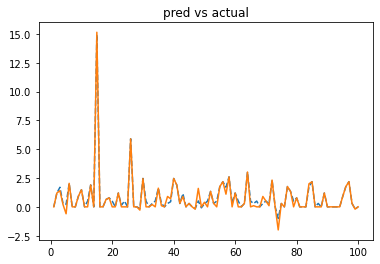

In [935]:
import matplotlib.pyplot as plt

plt.plot(test_columns_points['pred_total'][:100], linestyle = 'dashed')
plt.plot(test_columns['fantasy_points'][:100], linestyle = 'solid')
plt.title('pred vs actual')
plt.show()